# 3. Machine Learning for Classification




## 3.1 Homework: 

* Dataset:
* https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

In [49]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [50]:
data_path = "./classification/data/bank-full.csv"

In [51]:
data = pd.read_csv(data_path, sep=";")
rows, cols = data.shape
print(f"Number of rows: {rows}, total columns: {cols}")

Number of rows: 45211, total columns: 17


In [52]:
data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30619,44,technician,single,secondary,no,196,yes,no,cellular,6,feb,386,3,-1,0,unknown,no
24421,43,technician,married,secondary,no,0,no,yes,cellular,17,nov,103,2,193,3,failure,no
30960,28,services,single,secondary,no,217,yes,no,cellular,9,feb,379,3,-1,0,unknown,no
3563,36,management,married,tertiary,no,900,yes,no,unknown,15,may,475,2,-1,0,unknown,no
26429,52,blue-collar,married,secondary,no,4269,yes,yes,cellular,20,nov,44,1,-1,0,unknown,no
10080,27,technician,single,unknown,no,555,no,no,unknown,11,jun,240,9,-1,0,unknown,no
14227,39,management,married,secondary,no,-810,no,yes,cellular,14,jul,77,2,-1,0,unknown,no
40178,39,management,married,tertiary,no,1241,yes,no,cellular,5,jun,138,2,-1,0,unknown,no
38074,48,blue-collar,married,primary,yes,-50,yes,no,cellular,14,may,212,6,-1,0,unknown,no
27645,37,admin.,single,secondary,no,1097,yes,no,cellular,21,nov,1555,2,-1,0,unknown,yes


In [53]:
homework_cols = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y']

In [54]:
data_hm = data[homework_cols].copy()
data_hm.sample(10)

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10356,39,blue-collar,married,primary,292,no,unknown,12,jun,394,1,-1,0,unknown,no
6460,25,blue-collar,single,secondary,26,yes,unknown,27,may,66,2,-1,0,unknown,no
6485,32,services,married,secondary,-684,yes,unknown,27,may,298,3,-1,0,unknown,no
10212,56,retired,married,primary,0,no,unknown,11,jun,188,2,-1,0,unknown,no
29983,37,unemployed,single,tertiary,1032,no,telephone,4,feb,63,1,-1,0,unknown,no
14724,46,entrepreneur,divorced,secondary,-563,no,cellular,15,jul,769,4,-1,0,unknown,yes
4486,27,technician,single,tertiary,-291,yes,unknown,20,may,66,2,-1,0,unknown,no
7013,30,technician,single,tertiary,419,yes,unknown,28,may,299,3,-1,0,unknown,no
9860,52,housemaid,married,secondary,3034,no,unknown,9,jun,206,2,-1,0,unknown,no
15761,51,management,married,tertiary,2704,yes,telephone,21,jul,443,1,-1,0,unknown,no


In [55]:
data_hm.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [56]:
data_hm.describe(include='all')

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211.000000,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,NaN,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,NaN,yes,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,NaN,25130,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,1362.272058,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,3044.765829,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,-8019.000000,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,72.000000,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,448.000000,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,1428.000000,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


Let's check the target variable:

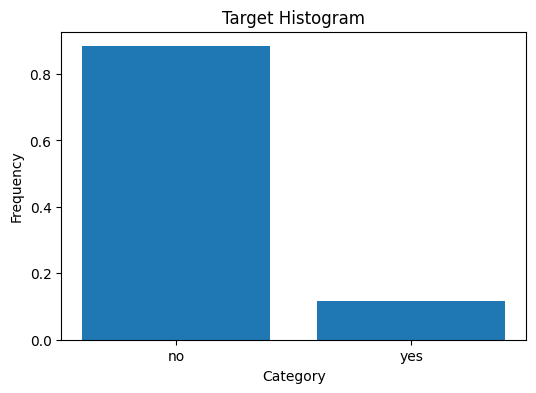

In [57]:
category_counts = data_hm['y'].value_counts(normalize=True)

# 2. Plot the bar plot
plt.figure(figsize=(6, 4)) 
plt.bar(category_counts.index, category_counts.values)

# 3. Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Target Histogram')
plt.show()

We have an unbalance dataset:

In [58]:
category_counts

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

Checking for missing values:

In [59]:
data_hm.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Let's separate the categorical columns

In [60]:
categorical_columns = data_hm.dtypes[data_hm.dtypes == 'object'].index.to_list()
categorical_columns.pop()
categorical_columns

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [61]:
data_hm[categorical_columns].nunique()

job          12
marital       3
education     4
housing       2
contact       3
month        12
poutcome      4
dtype: int64

In [62]:
from IPython.display import display

In [63]:
for cat in categorical_columns:
    display(data_hm[cat].value_counts(ascending=False))

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

housing
yes    25130
no     20081
Name: count, dtype: int64

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [64]:
numerical_colums = [col for col in data_hm.columns if col not in categorical_columns]
numerical_colums.pop()
numerical_colums

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Create the correlation matrix for the numerical features of the dataset

In [65]:
corr_mtx = data_hm[numerical_colums].corr()

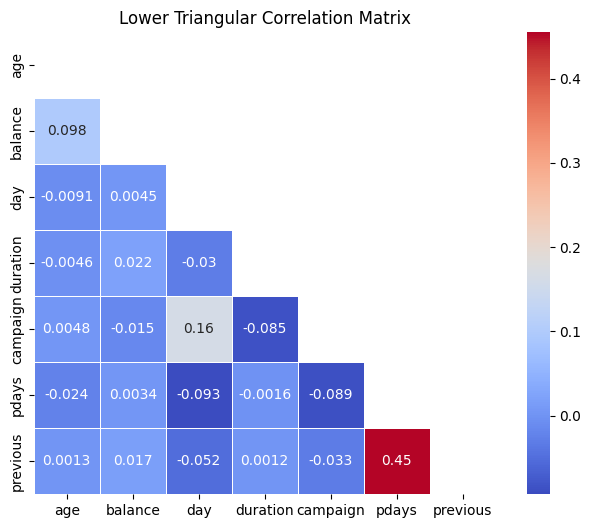

In [66]:
mask = np.triu(np.ones_like(corr_mtx, dtype=bool))

# 4. Plot the heatmap with the mask
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mtx, mask=mask, annot=True, cmap="coolwarm", linewidths=0.5, square=True)
plt.title("Lower Triangular Correlation Matrix")
plt.show()

### **Target encoding:**
Now we want to encode the 'y' variable.
Let's replace the values yes/no with 1/0

In [67]:
data_hm['y'] = (data_hm['y'] == 'yes').astype(int)

## Setting up the validation framework

* Perform the train/validation/test split with Scikit-Learn: with 60%/20%/20% distribution.

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
df_full_train, df_test = train_test_split(data_hm, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [70]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [71]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [72]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

Calculating the Mutual information score between 'y' and other categorical variables in the dataset:

In [73]:
from sklearn.metrics import mutual_info_score

In [80]:
def mutual_info_churn_score(series):
    return round(mutual_info_score(series, df_full_train.y), 2)

In [81]:
mi = df_full_train[categorical_columns].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

poutcome     0.03
month        0.02
job          0.01
housing      0.01
contact      0.01
marital      0.00
education    0.00
dtype: float64

## Fit a baseline model:

Let's encode the categorical variables using one-hot encoding:

In [82]:
from sklearn.feature_extraction import DictVectorizer

In [84]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_columns + numerical_colums].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_columns + numerical_colums].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [85]:
X_train.shape, X_val.shape

((27126, 47), (9042, 47))

Use a basic logistic regression model:

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [87]:
model_baseline = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [88]:
model_baseline.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [89]:
y_pred = model_baseline.predict_proba(X_val)[:, 1]
churn_decision_preds = (y_pred >= 0.5)

In [98]:
original_acc = accuracy_score(y_val, churn_decision_preds).round(2)
original_acc

0.9

Let's find the least useful feature using the feature elimination technique.

Feature elimination:

In [92]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import clone

In [97]:
df_train_copy = df_train.copy()
df_val_copy = df_val.copy()

In [99]:
df_train_copy.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,technician,single,tertiary,1100,yes,cellular,11,aug,67,1,-1,0,unknown
1,38,entrepreneur,married,secondary,0,yes,cellular,17,nov,258,1,-1,0,unknown
2,49,blue-collar,married,secondary,3309,yes,cellular,15,may,349,2,-1,0,unknown
3,37,housemaid,married,primary,2410,no,cellular,4,aug,315,1,-1,0,unknown
4,31,self-employed,married,tertiary,3220,no,cellular,26,aug,74,4,-1,0,unknown


In [101]:
# Initialize a dictionary to store the impact of removing each feature
feature_impact = {}

# Feature Elimination Loop
for feature in df_train_copy.columns:    
    # Remove the feature from the dataset (ensure we still have DataFrames)
    df_train_temp = df_train_copy.drop(columns=[feature])
    df_val_temp = df_val_copy.drop(columns=[feature])
    
     # Check if the dataset has only one column left, if so, break the loop
    if df_train_temp.shape[1] < 1:
        print("No features, stopping feature elimination.")
        break
    
    dictVec = DictVectorizer(sparse=False)
    train_dict_2 = df_train_temp.to_dict(orient='records')
    X_train_temp = dictVec.fit_transform(train_dict_2)
    val_dict_2 = df_val_temp.to_dict(orient='records')
    X_val_temp = dictVec.transform(val_dict_2)
    
    # Create and train model without the feature
    model_fe = clone(model_baseline)
    model_fe.fit(X_train_temp, y_train)
    accuracy_without_feature = accuracy_score(y_val, model_fe.predict(X_val_temp))
    
    # Calculate the impact of removing this feature
    impact = original_acc - accuracy_without_feature
    feature_impact[feature] = impact

# Sort the features by their impact
sorted_features = sorted(feature_impact.items(), key=lambda x: x[1])

# Output the least useful feature
print(f"The least useful feature is: {sorted_features[0]}")

The least useful feature is: ('previous', -0.0012386640123865922)


In [102]:
feature_impact

{'age': -0.0010174740101747126,
 'job': -0.001128069011280708,
 'marital': -0.0006856890068568378,
 'education': -0.0010174740101747126,
 'balance': -0.0010174740101747126,
 'housing': -0.000796284007962833,
 'contact': -0.0003539040035389629,
 'day': -0.0010174740101747126,
 'month': 0.0001990710019906805,
 'duration': 0.01037381110373814,
 'campaign': -0.0004644990046449582,
 'pdays': -0.0009068790090687173,
 'previous': -0.0012386640123865922,
 'poutcome': 0.006724176067241738}

Now let's train a regularized logistic regression.

In [104]:
# Define the parameter grid to search over
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
model_reg = clone(model_baseline)
model_reg

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [107]:
# Set up GridSearchCV with logistic regression and the parameter grid
grid_search = GridSearchCV(model_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [108]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best value of C
best_C = grid_search.best_params_['C']
print(f"The optimal C value is: {best_C}")

The optimal C value is: 10


In [109]:
# Use the best estimator (the one with the best C value) to make predictions
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_reg = best_model.predict(X_val)

# Calculate the accuracy on the test set
accuracy = accuracy_score(y_val, y_pred_reg)
print(f"Test set accuracy: {accuracy:.4f}")

Test set accuracy: 0.9009


In [110]:
y_tran_preds = best_model.predict(X_train)
accuracy_score(y_tran_preds, y_train)

0.9029344540293446